# Data Loading, EDA, and Wrangling

In [1]:
# load csv file to pandas dataframe
import pandas as pd

teach_geo_merged = pd.read_csv('teach_geo_merged.csv')

# display pandas dataframe(s)
print(teach_geo_merged.shape)
teach_geo_merged

(95791, 10)


,DistrictName,SchoolName,Prompt,StronglyDisagree,Disagree,Agree,StronglyAgree,zipcode,county,county_type
0,Anderson County,Andersonville Elementary,Atmosphere of trust/respect,0.0,6.0,53.0,0.0,37705,Anderson,mixed rural
1,Anderson County,Andersonville Elementary,Problem solving,0.0,6.0,59.0,0.0,37705,Anderson,mixed rural
2,Anderson County,Andersonville Elementary,Generally satisfied at this school,0.0,0.0,53.0,0.0,37705,Anderson,mixed rural
3,Anderson County,Andersonville Elementary,Atmosphere of trust/respect,0.0,6.0,71.0,0.0,37705,Anderson,mixed rural
4,Anderson County,Andersonville Elementary,Communication,6.0,12.0,41.0,6.0,37705,Anderson,mixed rural
...,...,...,...,...,...,...,...,...,...,...
95786,White County,Central View Elementary,Teacher evaluation process fair,0.0,0.0,64.0,0.0,38587,White,rural
95787,White County,Central View Elementary,Teacher evaluation process improves teaching,0.0,0.0,82.0,0.0,38587,White,rural
95788,White County,Central View Elementary,Teacher evaluation process improves student le...,0.0,0.0,82.0,0.0,38587,White,rural
95789,White County,Central View Elementary,Professional development tailored,0.0,0.0,100.0,0.0,38587,White,rural


In [2]:
# explore numeric values
teach_geo_merged.describe()


,StronglyDisagree,Disagree,Agree,StronglyAgree,zipcode
count,95791.000000,95791.000000,95791.000000,95791.000000,95791.000000
mean,4.517731,15.862023,53.102912,4.517731,37705.099373
std,6.961898,13.306021,15.369224,6.961898,466.075497
min,0.000000,0.000000,0.000000,0.000000,37013.000000
25%,0.000000,6.000000,44.000000,0.000000,37303.000000
50%,0.000000,13.000000,54.000000,0.000000,37743.000000
75%,7.000000,24.000000,64.000000,7.000000,38050.000000
max,90.000000,100.000000,100.000000,90.000000,38587.000000


In [3]:
# explore non-numeric values
teach_geo_merged.describe(exclude='number')

,DistrictName,SchoolName,Prompt,county,county_type
count,95791,95791,95791,95791,95791
unique,196,1325,33,95,4
top,Knox County,Central High School,Teachers have opportunity for leadership,Shelby,mixed rural
freq,3803,2442,9463,4592,40859


In [4]:
# explore missing, null values, dtypes
teach_geo_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95791 entries, 0 to 95790
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DistrictName      95791 non-null  object 
 1   SchoolName        95791 non-null  object 
 2   Prompt            95791 non-null  object 
 3   StronglyDisagree  95791 non-null  float64
 4   Disagree          95791 non-null  float64
 5   Agree             95791 non-null  float64
 6   StronglyAgree     95791 non-null  float64
 7   zipcode           95791 non-null  int64  
 8   county            95791 non-null  object 
 9   county_type       95791 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 7.3+ MB


In [5]:
# Wrangle and engineer data
# drop zipcode
teach_geo_merged_cleaned = teach_geo_merged.drop('zipcode', axis=1)

# display shape and dataframe 
print(teach_geo_merged_cleaned.shape)
teach_geo_merged_cleaned.head()


(95791, 9)


,DistrictName,SchoolName,Prompt,StronglyDisagree,Disagree,Agree,StronglyAgree,county,county_type
0,Anderson County,Andersonville Elementary,Atmosphere of trust/respect,0.0,6.0,53.0,0.0,Anderson,mixed rural
1,Anderson County,Andersonville Elementary,Problem solving,0.0,6.0,59.0,0.0,Anderson,mixed rural
2,Anderson County,Andersonville Elementary,Generally satisfied at this school,0.0,0.0,53.0,0.0,Anderson,mixed rural
3,Anderson County,Andersonville Elementary,Atmosphere of trust/respect,0.0,6.0,71.0,0.0,Anderson,mixed rural
4,Anderson County,Andersonville Elementary,Communication,6.0,12.0,41.0,6.0,Anderson,mixed rural


In [6]:
# Wrangle and engineer data
# drop redundant columns county == DistrictName
teach_geo_merged_cleaned = teach_geo_merged_cleaned.drop(columns='county', axis=1)

# display shape and dataframe 
print(teach_geo_merged_cleaned.shape)
teach_geo_merged_cleaned.head()

(95791, 8)


,DistrictName,SchoolName,Prompt,StronglyDisagree,Disagree,Agree,StronglyAgree,county_type
0,Anderson County,Andersonville Elementary,Atmosphere of trust/respect,0.0,6.0,53.0,0.0,mixed rural
1,Anderson County,Andersonville Elementary,Problem solving,0.0,6.0,59.0,0.0,mixed rural
2,Anderson County,Andersonville Elementary,Generally satisfied at this school,0.0,0.0,53.0,0.0,mixed rural
3,Anderson County,Andersonville Elementary,Atmosphere of trust/respect,0.0,6.0,71.0,0.0,mixed rural
4,Anderson County,Andersonville Elementary,Communication,6.0,12.0,41.0,6.0,mixed rural


In [8]:
# engineered features
# groupby 'prompt'
# frequency of prompt - engineered item 
teach_geo_merged['Prompt'].value_counts()

prompt_sorted = teach_geo_merged.sort_values(by='Prompt', 
                                             ascending=False).head()
                           
# display shape and dataframe 
print(prompt_sorted.shape)
prompt_sorted.head()


(5, 10)


,DistrictName,SchoolName,Prompt,StronglyDisagree,Disagree,Agree,StronglyAgree,zipcode,county,county_type
23214,Davidson County,Martin Luther King Jr School,School leadership proactively seeks to unders...,24.0,28.0,31.0,24.0,37203,Davidson,urban
77221,Germantown,Houston Middle School,School leadership proactively seeks to unders...,13.0,22.0,35.0,13.0,38139,Shelby,urban
37285,Hamilton County,Dalewood Middle School,School leadership proactively seeks to unders...,0.0,11.0,53.0,0.0,37411,Hamilton,mixed urban
1453,Anderson County,Norris Middle School,School leadership proactively seeks to unders...,0.0,21.0,53.0,0.0,37828,Anderson,mixed rural
21322,Cumberland County,Pine View Elementary,School leadership proactively seeks to unders...,0.0,13.0,50.0,0.0,37854,Roane,mixed rural


In [9]:
# the most frequently answered prompt
prompt_sort_count = prompt_sorted.groupby('Prompt').count()

# display shape and dataframe 
print(prompt_sort_count.shape)
prompt_sort_count.head(10)

(1, 9)


,DistrictName,SchoolName,StronglyDisagree,Disagree,Agree,StronglyAgree,zipcode,county,county_type
Prompt,,,,,,,,,
School leadership proactively seeks to understand the needs of teachers and staff.,5,5,5,5,5,5,5,5,5


In [10]:
teach_geo_merged_cleaned.head(100)

,DistrictName,SchoolName,Prompt,StronglyDisagree,Disagree,Agree,StronglyAgree,county_type
0,Anderson County,Andersonville Elementary,Atmosphere of trust/respect,0.0,6.0,53.0,0.0,mixed rural
1,Anderson County,Andersonville Elementary,Problem solving,0.0,6.0,59.0,0.0,mixed rural
2,Anderson County,Andersonville Elementary,Generally satisfied at this school,0.0,0.0,53.0,0.0,mixed rural
3,Anderson County,Andersonville Elementary,Atmosphere of trust/respect,0.0,6.0,71.0,0.0,mixed rural
4,Anderson County,Andersonville Elementary,Communication,6.0,12.0,41.0,6.0,mixed rural
...,...,...,...,...,...,...,...,...
95,Anderson County,Briceville Elementary,Classtime interruptions,0.0,25.0,25.0,0.0,mixed rural
96,Anderson County,Briceville Elementary,Parents partner with staff,0.0,75.0,25.0,0.0,mixed rural
97,Anderson County,Briceville Elementary,Teachers have opportunity for leadership,0.0,0.0,75.0,0.0,mixed rural
98,Anderson County,Briceville Elementary,Staff share same values,0.0,0.0,100.0,0.0,mixed rural


In [11]:
teach_geo_merged_cleaned.describe(exclude='number')


,DistrictName,SchoolName,Prompt,county_type
count,95791,95791,95791,95791
unique,196,1325,33,4
top,Knox County,Central High School,Teachers have opportunity for leadership,mixed rural
freq,3803,2442,9463,40859


In [12]:
teach_geo_merged_cleaned.index

RangeIndex(start=0, stop=95791, step=1)

In [13]:
teach_geo_merged_cleaned.describe(exclude='number')


,DistrictName,SchoolName,Prompt,county_type
count,95791,95791,95791,95791
unique,196,1325,33,4
top,Knox County,Central High School,Teachers have opportunity for leadership,mixed rural
freq,3803,2442,9463,40859


In [14]:
# define dtypes
categoricals = teach_geo_merged_cleaned[['DistrictName','SchoolName','Prompt','county_type']]
categorical_features = ['DistrictName','SchoolName','Prompt','county_type']
numerics = teach_geo_merged_cleaned[['StronglyAgree','Agree','Disagree','StronglyDisagree']]
numeric_features = ['StronglyAgree','Agree','Disagree','StronglyDisagree']


# Data Split and Transform

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split


# split and transform data
# define target and feature matrices
target = categoricals.drop(['DistrictName', 'SchoolName', 'Prompt'], axis=1)    
    # county_type only
features = teach_geo_merged_cleaned.drop(target, axis=1)              
    
    # all columns except target
# y = target
# X = features
# Encode our target
la_enc = LabelEncoder()
la_enc.fit(target)

# Encode our features
ord_enc = OrdinalEncoder()
ord_enc.fit(features)

# Transform and declare matrices
y = la_enc.transform(target)
y = pd.Series(y)

X = ord_enc.transform(features)
X = pd.DataFrame(X)

# split data into train/val/test data sets; 60/20/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# display shape of dataframe(s)
print('Train: ', X_train.shape, y_train.shape)
print('Validation: ', X_val.shape, y_val.shape)
print('Test: ', X_test.shape, y_test.shape)

c:\users\jp353\.virtualenvs\envtest-196fsndc\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\jp353\.virtualenvs\envtest-196fsndc\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Train:  (57474, 7) (57474,)
Validation:  (19159, 7) (19159,)
Test:  (19158, 7) (19158,)


In [16]:
# baseline metrics - classification, accuracy, value counts on training dataset
print('Baseline Accuracy:', y_train.value_counts(normalize=True).max())


Baseline Accuracy: 0.42803702543758915


## EDA of Transformed Data

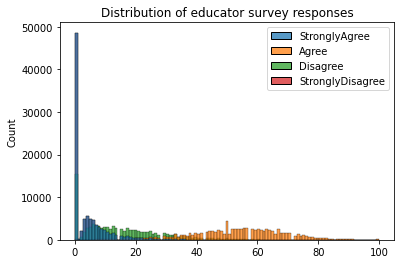

In [52]:
# distribution of numerics
%matplotlib inline

import seaborn as sns
sns.histplot(numerics).set_title('Distribution of educator survey responses');

# the zero here indicates that a question was unanswered


In [18]:
categoricals.head()


,DistrictName,SchoolName,Prompt,county_type
0,Anderson County,Andersonville Elementary,Atmosphere of trust/respect,mixed rural
1,Anderson County,Andersonville Elementary,Problem solving,mixed rural
2,Anderson County,Andersonville Elementary,Generally satisfied at this school,mixed rural
3,Anderson County,Andersonville Elementary,Atmosphere of trust/respect,mixed rural
4,Anderson County,Andersonville Elementary,Communication,mixed rural


c:\users\jp353\.virtualenvs\envtest-196fsndc\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


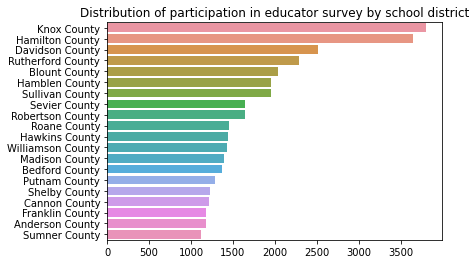

In [54]:
# distibution of categoricals
# participation in survey by school district
top20_index_dn = categoricals['DistrictName'].value_counts().index[0:20]
     # select top 20 school districts that participate in survey
top20_dn_mask = categoricals['DistrictName'].isin(top20_index_dn)
     # create mask including top 20 school districts that participate in survey
top20_dn = categoricals['DistrictName'][top20_dn_mask]
     # implement mask to create named x/y variable for mapping
top20_dn_vc = top20_dn.value_counts().values
     # create named x/y variable for mapping


# Top 20 schools
%matplotlib inline
import seaborn as sns
sns.barplot(top20_dn_vc, top20_index_dn).set_title('Distribution of participation in educator survey by school district');


c:\users\jp353\.virtualenvs\envtest-196fsndc\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


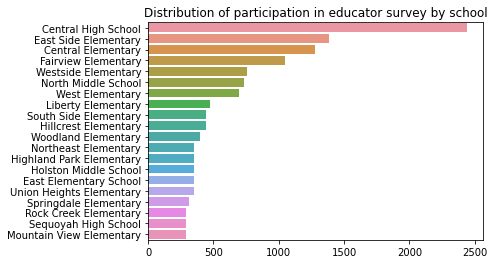

In [55]:
# distibution of categoricals
# participation in survey by school
top20_index_sn = categoricals['SchoolName'].value_counts().index[0:20]
     # select top 20 schools that participate in survey
top20_sn_mask = categoricals['SchoolName'].isin(top20_index_sn)
     # create mask including top 20 schools that participate in survey
top20_sn = categoricals['SchoolName'][top20_sn_mask]
     # implement mask to create named x/y variable for mapping
top20_sn_vc = top20_sn.value_counts().values
     # create named x/y variable for mapping


# Top 20 schools
%matplotlib inline
import seaborn as sns
sns.barplot(top20_sn_vc, top20_index_sn).set_title('Distribution of participation in educator survey by school');



c:\users\jp353\.virtualenvs\envtest-196fsndc\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


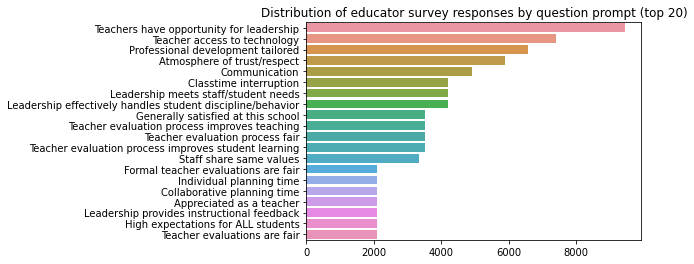

In [56]:
# distibution of categoricals
# participation in survey by promt
top20_index_p = categoricals['Prompt'].value_counts().index[0:20]
     # select top 20 survey prompts that teachers answered in survey
top20_p_mask = categoricals['Prompt'].isin(top20_index_p)
     # create mask including top 20 survey prompts that teachers answered in survey
top20_p = categoricals['Prompt'][top20_p_mask]
     # implement mask to create named x/y variable for mapping
top20_p_vc = top20_p.value_counts().values
     # create named x/y variable for mapping


# Top 20 schools
%matplotlib inline
import seaborn as sns
sns.barplot(top20_p_vc, top20_index_p).set_title('Distribution of educator survey responses by question prompt (top 20)');


c:\users\jp353\.virtualenvs\envtest-196fsndc\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


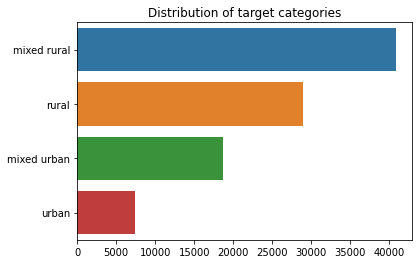

In [57]:
# visualze target data
# by category
# distibution of categoricals
# participation in survey by county type
top4_index_ct = target['county_type'].value_counts().index[0:4]
     # select classification frequency of schools that participate in survey
top4_ct_mask =  target['county_type'].isin(top4_index_ct)
     # create mask including classification of schools that participate in survey
top4_ct =  target['county_type'][top4_ct_mask]
     # implement mask to create named x/y variable for mapping
top4_ct_vc = top4_ct.value_counts().values
     # create named x/y variable for mapping


# Target categories distribution
%matplotlib inline
import seaborn as sns
sns.barplot(top4_ct_vc, top4_index_ct).set_title('Distribution of target categories');


#sns.histplot(y_train);


# Models

## Logistic Regression Model

In [23]:
# import libraries
import numpy as np

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


pipeline = make_pipeline(
    RobustScaler(),
    LogisticRegression(solver='saga') # hyperparam set for larger dataset and fewer penalties
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
y_pred_train = pipeline.predict(X_train)
y_pred_val = pipeline.predict(X_val)

#Metrics
print('Training Accuracy, predicted values: ', accuracy_score(y_train, y_pred_train))
print('Validation Accuracy, predicted values: ', accuracy_score(y_val, y_pred_val))
print()
# display shape of dataframe(s)
print('Train: ', X_train.shape, y_train.shape)
print('Validation: ', X_val.shape, y_val.shape)
print('Test: ', X_test.shape, y_test.shape)

Training Accuracy, predicted values:  0.4289069840275603
Validation Accuracy, predicted values:  0.4303460514640639

Train:  (57474, 7) (57474,)
Validation:  (19159, 7) (19159,)
Test:  (19158, 7) (19158,)


## XGBoost Classifier

In [26]:
# gradient tree method for use with tree models
from xgboost import XGBClassifier

# instantiate gradient boost
xg_classifier = XGBClassifier(n_estimators=50,
                              objective='multi:softprob',    # hyperparameter set for probabilities
                              random_state=42,
                              )

# fit on train
xg_classifier.fit(X_train,y_train)

# Metrics
print('Training Accuracy: XGboost', xg_classifier.score(X_train, y_train))
print('Validation Accuracy: XGboost', xg_classifier.score(X_val, y_val))
print()
# display shape of dataframe(s)
print('Train: ', X_train.shape, y_train.shape)
print('Validation: ', X_val.shape, y_val.shape)
print('Test: ', X_test.shape, y_test.shape)


Training Accuracy: XGboost 0.9307860945818979
Validation Accuracy: XGboost 0.9244219426901196

Train:  (57474, 7) (57474,)
Validation:  (19159, 7) (19159,)
Test:  (19158, 7) (19158,)


## Feature Selection

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

# feature selection - using chi^2
# used for numeric data
# selects features according to highest scores
fs = SelectKBest(score_func=chi2, k='all')

# fit to training dataset
fs.fit(X_train, y_train)

# transform to training dataset
X_train_fs = fs.transform(X_train)

# transform to validation dataset
X_val_fs = fs.transform(X_val)


In [28]:
# feature selection - using mutual information
# selects features according to highest scores - for use with 
#    discrete and contiuous features
fs_mi = SelectKBest(score_func=mutual_info_classif, k='all')

# fit to training dataset
fs_mi.fit(X_train, y_train)

# transform to training dataset
X_train_fs_mi = fs_mi.transform(X_train)

# transform to validation dataset
X_val_fs_mi = fs_mi.transform(X_val)


## Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer
from category_encoders import OrdinalEncoder
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Make pipeline!
pipeline = make_pipeline(
    #FunctionTransformer(wrangle, validate=False), 
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=100, 
                           random_state=42,
                           criterion='entropy',
                           n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
# prediction
y_pred_train_rf = pipeline.predict(X_train)
y_pred_val_rf = pipeline.predict(X_val)
y_pred_test_rf = pipeline.predict(X_test)
# Metrics
print('Training Accuracy: model', pipeline.score(X_train, y_train))
print('Validation Accuracy: model', pipeline.score(X_val, y_val))
print('Testing Accuracy: model: ', pipeline.score(X_test, y_test))
print()
print('Training Accuracy, predicted values: ', accuracy_score(y_train, y_pred_train_rf))
print('Validation Accuracy, predicted values: ', accuracy_score(y_val, y_pred_val_rf))
print('Testing Accuracy, predicted values: ', accuracy_score(y_test, y_pred_test_rf))
print()
# display shape of dataframe(s)
print('Train: ', X_train.shape, y_train.shape)
print('Validation: ', X_val.shape, y_val.shape)
print('Test: ', X_test.shape, y_test.shape)


Training Accuracy: model 0.946775933465567
Validation Accuracy: model 0.8726447100579362
Testing Accuracy: model:  0.8780666040296482

Training Accuracy, predicted values:  0.946775933465567
Validation Accuracy, predicted values:  0.8726447100579362
Testing Accuracy, predicted values:  0.8780666040296482

Train:  (57474, 7) (57474,)
Validation:  (19159, 7) (19159,)
Test:  (19158, 7) (19158,)


# Model Evaluation

In [36]:
# Kfold for crossvalidation of model
from numpy import array
from sklearn.model_selection import KFold

kfold = KFold(3, True, 1)

# enumerate splits
for X_train, X_test in kfold.split(X_train):
    print('train: %s, test: %s' % (X_train, X_test))
    

train: [    0     1     4 ... 57471 57472 57473], test: [    2     3    10 ... 57458 57466 57470]
train: [    1     2     3 ... 57470 57472 57473], test: [    0     4     6 ... 57467 57468 57471]
train: [    0     2     3 ... 57468 57470 57471], test: [    1     5     9 ... 57469 57472 57473]


# Summary Visualizations

In [103]:
# create df(s) for mapping
# true values
y_train_df = pd.DataFrame({'category':y_train}).value_counts().reset_index()
y_train_df['set'] = 'ytrain'

y_val_df = pd.DataFrame({'category':y_val}).value_counts().reset_index()
y_val_df['set'] = 'yval'

y_test_df = pd.DataFrame({'category':y_test}).value_counts().reset_index()
y_test_df['set'] = 'ytest'


In [104]:
# concat df(s)
bar_y = pd.concat([y_train_df,y_val_df,y_test_df])
bar_y

,category,0,set
0,0,24601,ytrain
1,2,17336,ytrain
2,1,11084,ytrain
3,3,4453,ytrain
0,0,8218,yval
1,2,5727,yval
2,1,3738,yval
3,3,1476,yval
0,0,8040,ytest
1,2,5821,ytest


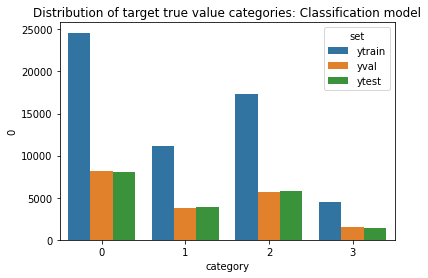

In [112]:
# visualze target data
# by category
# distibution of categoricals

# Target categories distribution
%matplotlib inline
import seaborn as sns
sns.barplot(x='category', 
            y=0, data=bar_y, 
            hue='set').set_title('Distribution of target true value categories: Classification model');

In [115]:
# create df for mapping
# predicted values
y_tr_rf_df = pd.DataFrame({'category':y_pred_train_rf}).value_counts().reset_index()
y_tr_rf_df['set'] = 'ytrain, pred'

y_v_rf_df = pd.DataFrame({'category':y_pred_val_rf}).value_counts().reset_index()
y_v_rf_df['set'] = 'yval, pred'

y_t_rf_df = pd.DataFrame({'category':y_pred_test_rf}).value_counts().reset_index()
y_t_rf_df['set'] = 'ytest, pred'


In [116]:
# concat df(s)
bar_y_rf = pd.concat([y_tr_rf_df,y_v_rf_df,y_t_rf_df])
bar_y_rf

,category,0,set
0,0,24842,"ytrain, pred"
1,2,17810,"ytrain, pred"
2,1,10515,"ytrain, pred"
3,3,4307,"ytrain, pred"
0,0,8438,"yval, pred"
1,2,5759,"yval, pred"
2,1,3576,"yval, pred"
3,3,1386,"yval, pred"
0,0,8344,"ytest, pred"
1,2,5895,"ytest, pred"


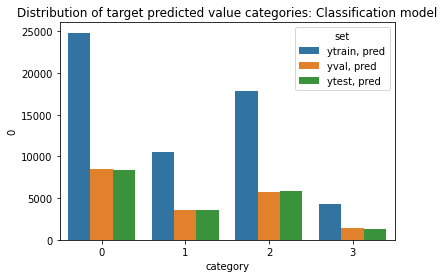

In [117]:
# visualze target data
# by category
# distibution of categoricals

# Target categories distribution
%matplotlib inline
import seaborn as sns
sns.barplot(x='category', 
            y=0, data=bar_y_rf, 
            hue='set').set_title('Distribution of target predicted value categories: Classification model');